# **Solubility Prediction using Machine Learning**

This project uses machine learning models to predict the aqueous solubility (LogS) of molecules based on chemical descriptors. Two models are trained and compared:

- Linear Regression
- Random Forest Regressor

I evaluate each model’s performance using common regression metrics and visualize the results to understand how well they perform.

## **Load Dataset**

I load the dataset from a public GitHub repository. It contains molecular descriptors and experimental LogS values (log of solubility).

In [57]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## Split Data into Features (X) and Target (y)

Ie separate the dataset into:
- `X`: the features (molecular descriptors)
- `y`: the target variable (LogS)

In [73]:
y = df['logS']
X = df.drop('logS', axis=1)

## Split Dataset into Training and Test Sets

I use an 80/20 split to train the models on one part of the data and test their performance on unseen data.

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

## Model 1: Linear Regression

I train a simple linear regression model and evaluate its performance on both training and test sets.

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

## Evaluate Linear Regression

I use two metrics:
- Mean Squared Error (MSE): measures average prediction error (lower is better)
- R-squared (R²): measures how well the model explains the data (higher is better)


In [77]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
lr_results


,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## Model 2: Random Forest Regressor

I now train a more flexible model, Random Forest, which uses multiple decision trees to make predictions. This model often captures more complex patterns.


In [78]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

## Evaluate Random Forest

I apply the same evaluation metrics as before to measure this model's performance.


In [79]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


## Compare Model Performance

I combine both models' results to compare them side-by-side. Generally, the model with higher R² and lower MSE is considered better.

In [80]:
df_models = pd.concat([lr_results, rf_results], axis=0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


## Model Prediction Comparison

These scatter plots compare the predicted LogS values to the actual experimental LogS values for both models.

- The **dashed black line** (`y = x`) represents perfect predictions. The closer the points are to this line, the more accurate the model.
- The **red/orange line** is a fitted trend line that shows how each model's predictions behave overall.
- Both plots share the same axis limits to allow for direct visual comparison.

By comparing the scatter and trend lines, we can visually assess how well each model is performing.

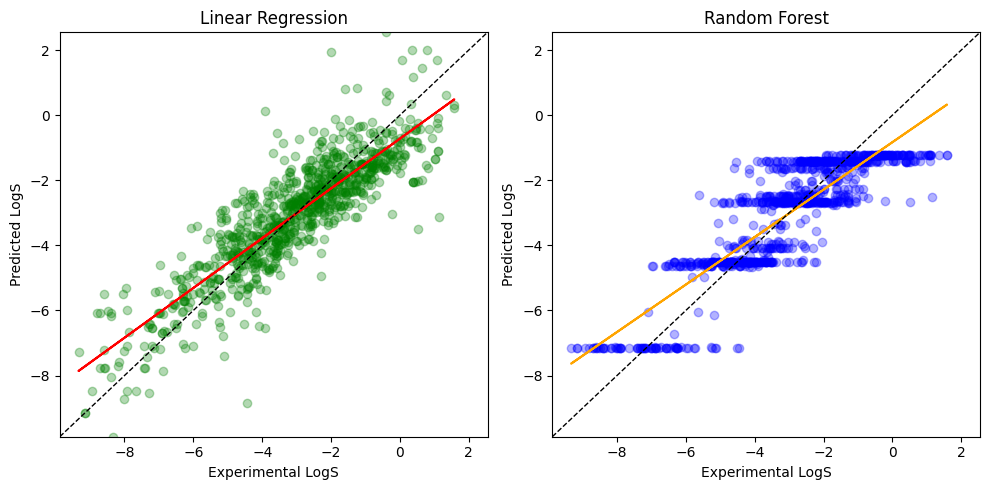

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Find global min and max for axes
y_min = min(y_train.min(), y_lr_train_pred.min(), y_rf_train_pred.min())
y_max = max(y_train.max(), y_lr_train_pred.max(), y_rf_train_pred.max())

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Linear Regression Plot ---
axes[0].scatter(y_train, y_lr_train_pred, c='green', alpha=0.3)
z_lr = np.polyfit(y_train, y_lr_train_pred, 1)
p_lr = np.poly1d(z_lr)
axes[0].plot(y_train, p_lr(y_train), 'red')
axes[0].plot([y_min, y_max], [y_min, y_max], 'k--', lw=1)
axes[0].set_title("Linear Regression")
axes[0].set_xlabel("Experimental LogS")
axes[0].set_ylabel("Predicted LogS")
axes[0].set_xlim(y_min, y_max)
axes[0].set_ylim(y_min, y_max)

# --- Random Forest Plot ---
axes[1].scatter(y_train, y_rf_train_pred, c='blue', alpha=0.3)
z_rf = np.polyfit(y_train, y_rf_train_pred, 1)
p_rf = np.poly1d(z_rf)
axes[1].plot(y_train, p_rf(y_train), 'orange')
axes[1].plot([y_min, y_max], [y_min, y_max], 'k--', lw=1)
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Experimental LogS")
axes[1].set_ylabel("Predicted LogS")
axes[1].set_xlim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


## Conclusion

- **Random Forest Regressor** achieved better accuracy than Linear Regression on both training and test data.
- This suggests that Random Forest was better at capturing complex patterns in the molecular data.
- Linear Regression, while simpler, might be underfitting the data.

This project demonstrates how different ML models can be used to predict molecular properties and highlights the importance of model evaluation.